In [187]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [188]:
df = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')

In [189]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [190]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [192]:
df.shape

(953, 24)

# Prepare the data

In [193]:
numeric_cols = ['artist_count', 'released_year', 'released_month', 'released_day', 
                'in_spotify_playlists', 'in_spotify_charts', 'streams', 
                'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 
                'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 
                'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
                'liveness_%', 'speechiness_%']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Popular Tracks

In [194]:
df.nlargest(10, 'streams')[['track_name', 'artist(s)_name', 'streams']]

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


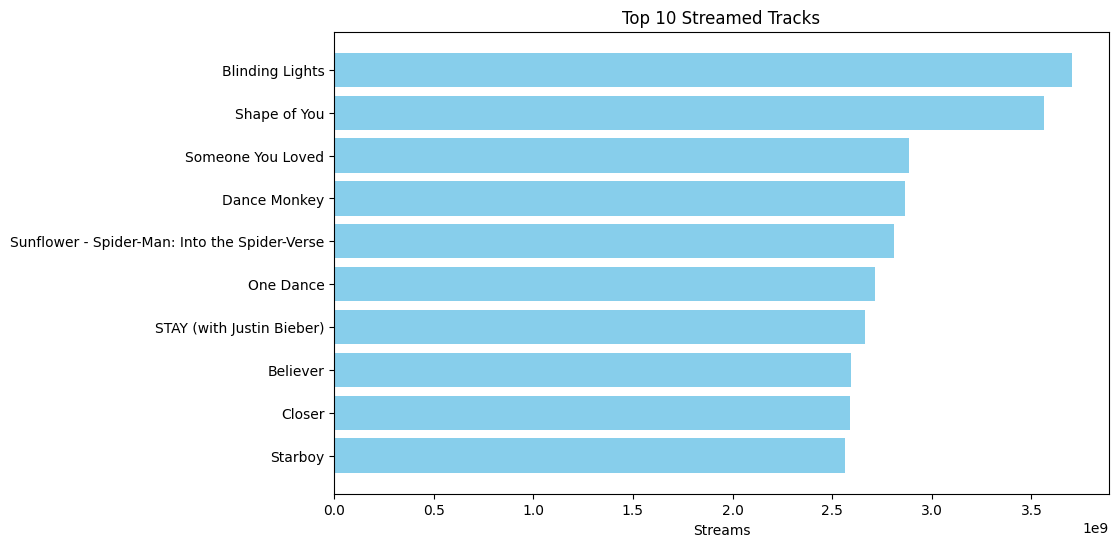

In [195]:
top_tracks = df.nlargest(10, 'streams')[['track_name', 'streams']]
plt.figure(figsize=(10, 6))
plt.barh(top_tracks['track_name'], top_tracks['streams'], color='skyblue')
plt.xlabel('Streams')
plt.title('Top 10 Streamed Tracks')
plt.gca().invert_yaxis()
plt.show()

# Popular Artists

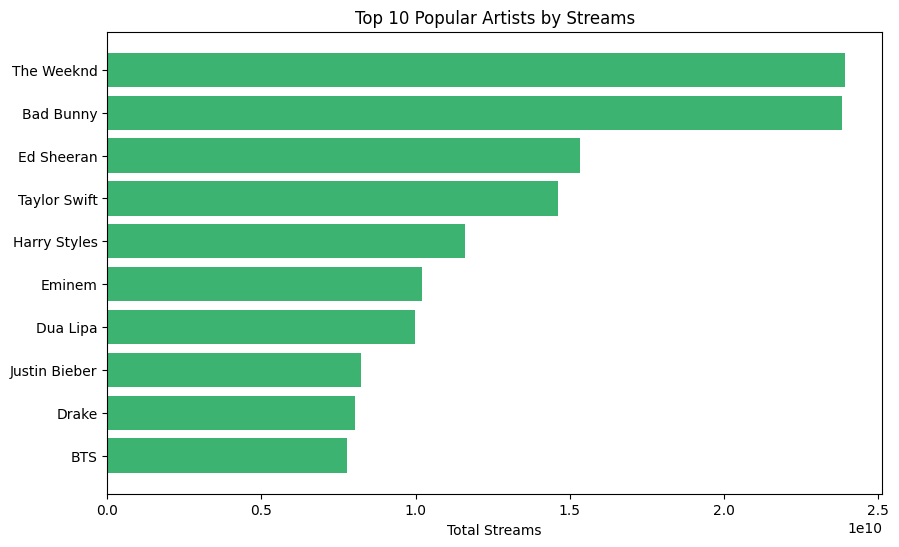

In [196]:
df['artist_list'] = df['artist(s)_name'].str.split(', ')
artist_streams = df.explode('artist_list').groupby('artist_list')['streams'].sum().reset_index()

top_artists = artist_streams.nlargest(10, 'streams')

plt.figure(figsize=(10, 6))
plt.barh(top_artists['artist_list'], top_artists['streams'], color='mediumseagreen')
plt.xlabel('Total Streams')
plt.title('Top 10 Popular Artists by Streams')
plt.gca().invert_yaxis()  
plt.show()

# Top Artists By Average Song Streams

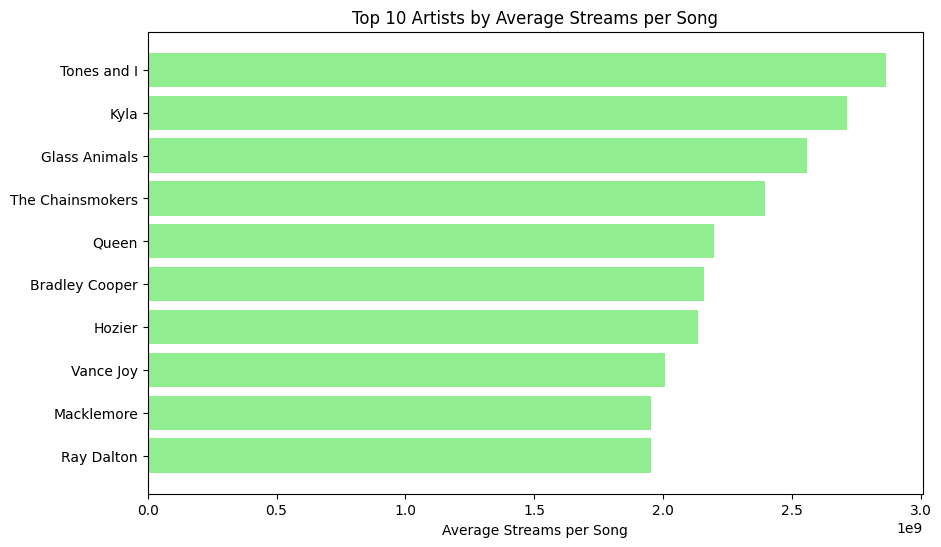

In [197]:
df['artist_list'] = df['artist(s)_name'].str.split(', ')
df_exploded = df.explode('artist_list')

artist_stats = df_exploded.groupby('artist_list').agg(
    total_streams=('streams', 'sum'),
    total_songs=('track_name', 'count')
).reset_index()

artist_stats['average_streams_per_song'] = artist_stats['total_streams'] / artist_stats['total_songs']

top_artists_avg_streams = artist_stats.nlargest(10, 'average_streams_per_song')

plt.figure(figsize=(10, 6))
plt.barh(top_artists_avg_streams['artist_list'], top_artists_avg_streams['average_streams_per_song'], color='lightgreen')
plt.xlabel('Average Streams per Song')
plt.title('Top 10 Artists by Average Streams per Song')
plt.gca().invert_yaxis() 
plt.show()

# Checking Correlations

In [198]:
streams_correlation = df.corr(numeric_only=True)['streams'].drop('streams')
streams_correlation

artist_count           -0.136463
released_year          -0.230803
released_month         -0.024938
released_day            0.010598
in_spotify_playlists    0.789822
in_spotify_charts       0.245821
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_deezer_playlists     0.746022
in_deezer_charts        0.228598
in_shazam_charts        0.056881
bpm                    -0.002438
danceability_%         -0.105457
valence_%              -0.040831
energy_%               -0.026051
acousticness_%         -0.004485
instrumentalness_%     -0.044902
liveness_%             -0.048337
speechiness_%          -0.112333
Name: streams, dtype: float64

Checking the top most positively and negatively correlated variables

In [199]:
sorted_streams_correlation = streams_correlation.reindex(streams_correlation.abs().sort_values(ascending=False).index)
sorted_streams_correlation

in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.746022
in_apple_charts         0.320234
in_spotify_charts       0.245821
released_year          -0.230803
in_deezer_charts        0.228598
artist_count           -0.136463
speechiness_%          -0.112333
danceability_%         -0.105457
in_shazam_charts        0.056881
liveness_%             -0.048337
instrumentalness_%     -0.044902
valence_%              -0.040831
energy_%               -0.026051
released_month         -0.024938
released_day            0.010598
acousticness_%         -0.004485
bpm                    -0.002438
Name: streams, dtype: float64

It's very clear that being included in playlists has the strongest correlations to number of streams. This can work both ways as most popular songs will naturally be included in more playlists but also including a song in a playlist will result in it being streamed more often.

# Streams by Release Decade

Let's see if there's a difference in the number of streams a song produces depending on what decade it was released in.

In [200]:
df['decade'] = (df['released_year'] // 10) * 10

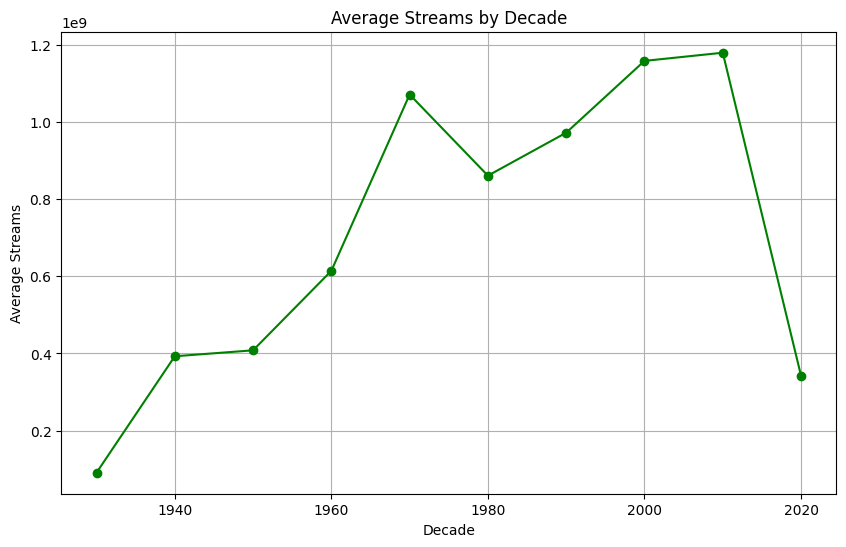

In [201]:
streams_by_year = df.groupby('decade')['streams'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(streams_by_year['decade'], streams_by_year['streams'], marker='o', color='green')
plt.xlabel('Decade')
plt.ylabel('Average Streams')
plt.title('Average Streams by Decade')
plt.grid(True)
plt.show()

It looks as though the more recent decades (with the exception of 2020s) have more popular songs.

Let's run a one-way ANOVA test to determine whether there is any statistical significance here. 

$H_{0}$: There is no difference between the decade that a song is released in and how many streams it gets.

$H_{a}$: There is a difference between the decade that a song is released in and how many streams it gets.

In [227]:
decade_songs = df['decade'].value_counts()
decades_enough_data = decade_songs[decade_songs >= 5].index
filtered_df_decades = df[df['decade'].isin(decades_enough_data)]

In [228]:
filtered_df_decades['streams'].isna().sum()

1

In [204]:
print("Missing values in streams column:", filtered_df_decades['streams'].isna().sum())


Missing values in streams column: 1


In [205]:
filtered_df_decades = filtered_df_decades.dropna(subset=['streams'])

In [206]:
anova_groups_decades = [filtered_df_decades[filtered_df_decades['decade'] == decade]['streams'] for decade in decades_enough_data]
anova_groups_decades = [group for group in anova_groups_decades if not group.empty]
if len(anova_groups_decades) > 1:
    anova_result_decades = stats.f_oneway(*anova_groups_decades)
    print("ANOVA Result for Decades:\n", anova_result_decades)
else:
    print("Not enough groups with data to perform ANOVA.")


ANOVA Result for Decades:
 F_onewayResult(statistic=80.13675342659764, pvalue=6.560802539006862e-81)


The extremely small p-value allows us to reject the null hypothesis. In combination with a high F-Statistic, we can say that there's a statistically significant difference between each decade and the popularity of the songs released in them.

Let's look closer with a box plot graph.

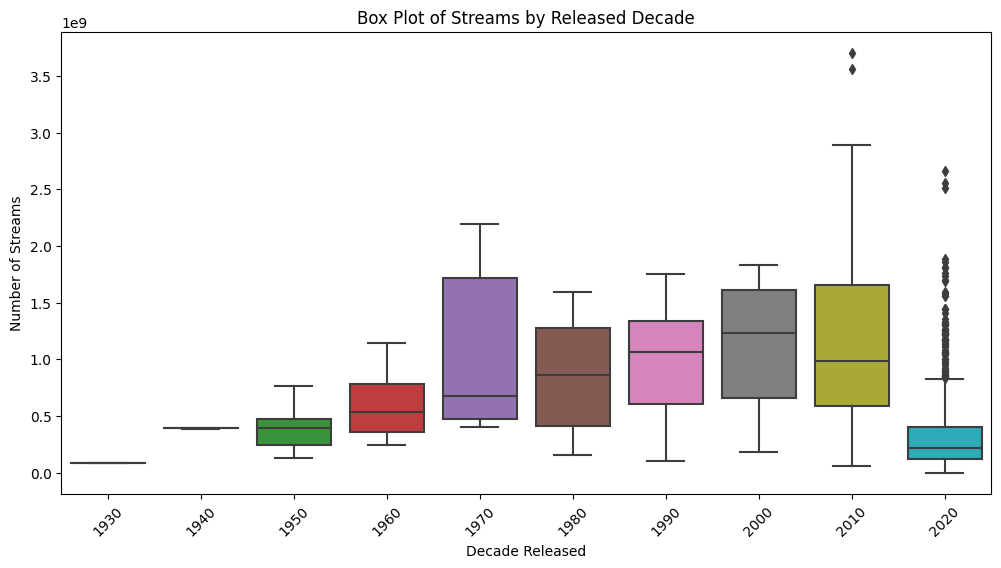

In [207]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y='streams', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Streams by Released Decade')
plt.xlabel('Decade Released')
plt.ylabel('Number of Streams')
plt.show()

There is an uptick in the median value as each decade gets closer to present day. Showing that more recent songs tend to be more popular than older songs. This can be explained by the recency bias and current cultural context. In 2023 people are more likely to listen to songs that are more recently released than those released many decades ago.

There are a few thoughts which may exlpain why the 2020s have a sudden drop in the median. As it's clear in the above graph there's a high variability in the number of streams songs have been getting in the 2020s.

1. **Less Time for Stream Accumulation**:
The 2020s being more recent have allowed less time for songs to gain total number of streams whereas songs in the early 2000s have had much longer to accumulate streams
2. **Emergence of Short Form Social Media**:
The emergence of social media platforms like TikTok have paved ways for countless new artists to produce popular songs which has led to an influx of new artists producing and putting out music on Spotify. A lot of these songs will be highly popular and gain many streams while other songs will have very few streams.
3. **Rise of Microtrends**:
Another change that TikTok and similar platforms have brought about is the increase in microtrends, which extends to music. A song will often become very popular for a short period of time and very quickly after forgetting leading to a lower total number of streams produced than longer lasting song trends as seen in the early 2000s.

# Streams by Release Year

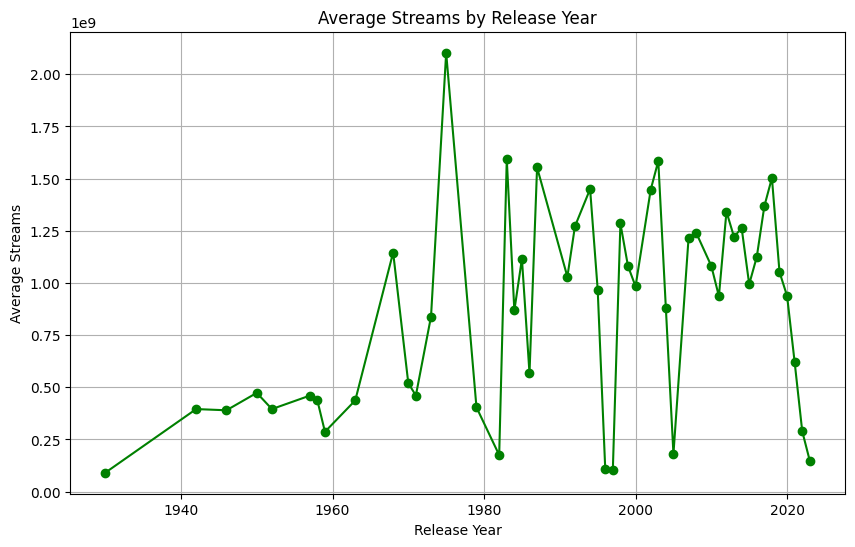

In [208]:
streams_by_year = df.groupby('released_year')['streams'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(streams_by_year['released_year'], streams_by_year['streams'], marker='o', color='green')
plt.xlabel('Release Year')
plt.ylabel('Average Streams')
plt.title('Average Streams by Release Year')
plt.grid(True)
plt.show()

Checking why there's an uptick in 1975.

In [209]:
songs_1978 = df[df['released_year'] == 1975]
print(songs_1978[['track_name', 'artist(s)_name', 'released_year', 'streams']])

                              track_name artist(s)_name  released_year  \
80                               Riptide      Vance Joy           1975   
717  Bohemian Rhapsody - Remastered 2011          Queen           1975   

          streams  
80   2.009095e+09  
717  2.197011e+09  


Two very popular songs released in the same year causing a spike in streams for that release year.

Checking why there's an uptick in 1968.

In [210]:
songs_1978 = df[df['released_year'] == 1968]
print(songs_1978[['track_name', 'artist(s)_name', 'released_year', 'streams']])

                       track_name                artist(s)_name  \
195  Have You Ever Seen The Rain?  Creedence Clearwater Revival   

     released_year       streams  
195           1968  1.145728e+09  


Let's run a one-way ANOVA test to determine whether there is any statistical significance here. 

$H_{0}$: There is no difference between the year that a song is released in and how many streams it gets.

$H_{a}$: There is a difference between the year that a song is released in and how many streams it gets.

In [211]:
year_songs = df['released_year'].value_counts()
year_songs

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

There are many years with too few songs to inlcude in the ANOVA test so we'll remove them. This will mean that our results won't be complete but it will still provide a good view. Later we will combine the years by decades to get a more thorough view.

In [212]:
years_enough_data = year_songs[year_songs >= 5].index
filtered_df = df[df['released_year'].isin(years_enough_data)]

In [213]:
anova_groups = [filtered_df[filtered_df['released_year'] == year]['streams'] for year in years_enough_data]
anova_groups = [group for group in anova_groups if not group.empty]
if len(anova_groups) > 1:
    anova_result = stats.f_oneway(*anova_groups)
    print("ANOVA Result:\n", anova_result)
else:
    print("Not enough groups with data to perform ANOVA.")


ANOVA Result:
 F_onewayResult(statistic=49.38308681977072, pvalue=1.1516258229685628e-105)


The F-Statistic is 49.383 suggesting that there's a significant difference between the number of streams a song gets and the year that it was released in. 

The p-value as well being well below 0.05 suggests that the null hypothesis is very likley false and that there is a difference in the number of streams a song gets and the year that it was released in.

Let's now get a better view of the data using box plots.


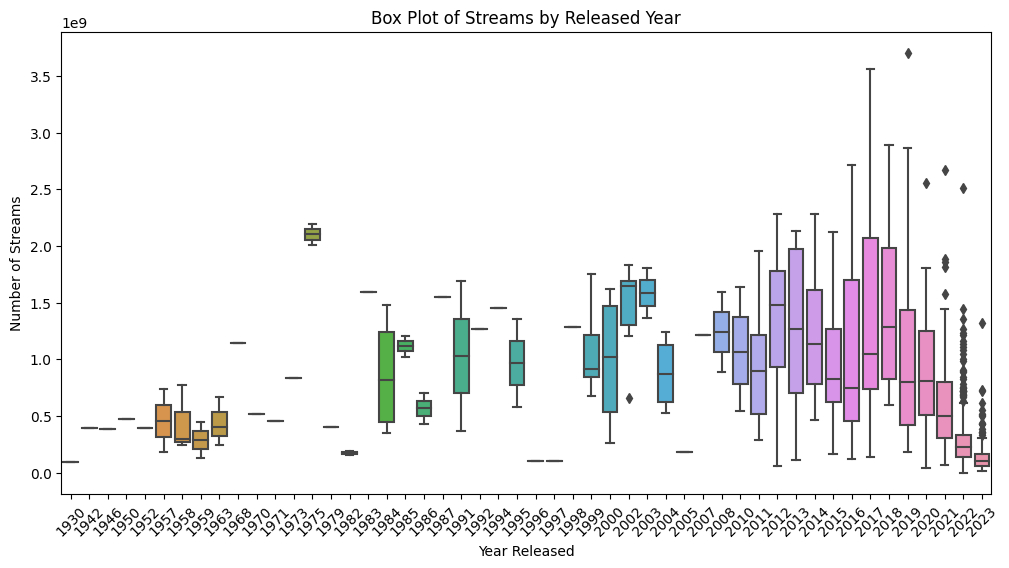

In [214]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='released_year', y='streams', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Streams by Released Year')
plt.xlabel('Year Released')
plt.ylabel('Number of Streams')
plt.show()

# Streams by Release Month

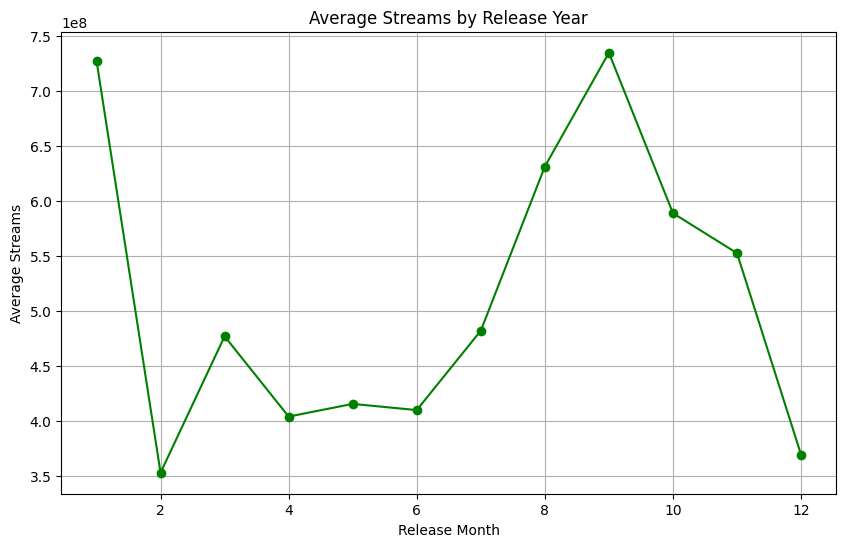

In [215]:
streams_by_year = df.groupby('released_month')['streams'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(streams_by_year['released_month'], streams_by_year['streams'], marker='o', color='green')
plt.xlabel('Release Month')
plt.ylabel('Average Streams')
plt.title('Average Streams by Release Year')
plt.grid(True)
plt.show()

This confirms that January released songs are the most popular, followed by September. In combination with the last graph we can see that fewer songs are released in the Summer but they're more popular.

Now let's see whether January's spike is caused by a few outliers or whether this is a trend

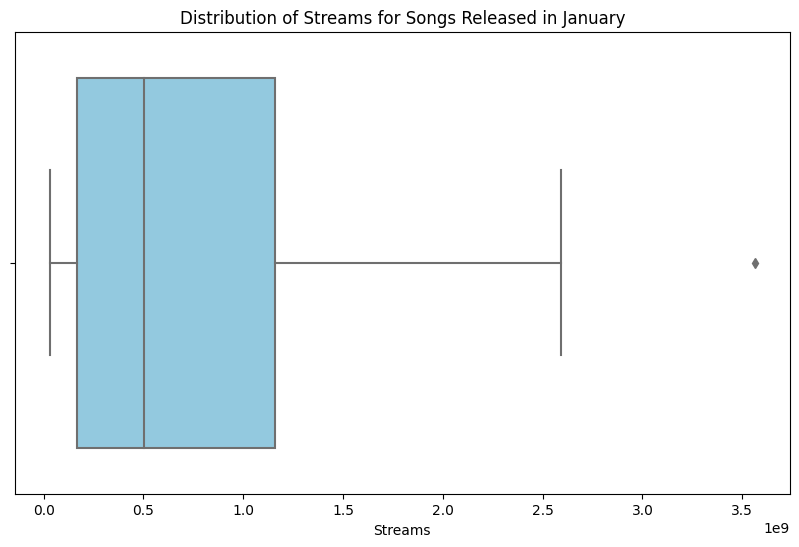

In [216]:
january_songs = df[df['released_month'] == 1]

plt.figure(figsize=(10, 6))

sns.boxplot(x=january_songs['streams'], color='skyblue')

plt.xlabel('Streams')
plt.title('Distribution of Streams for Songs Released in January')
plt.show()

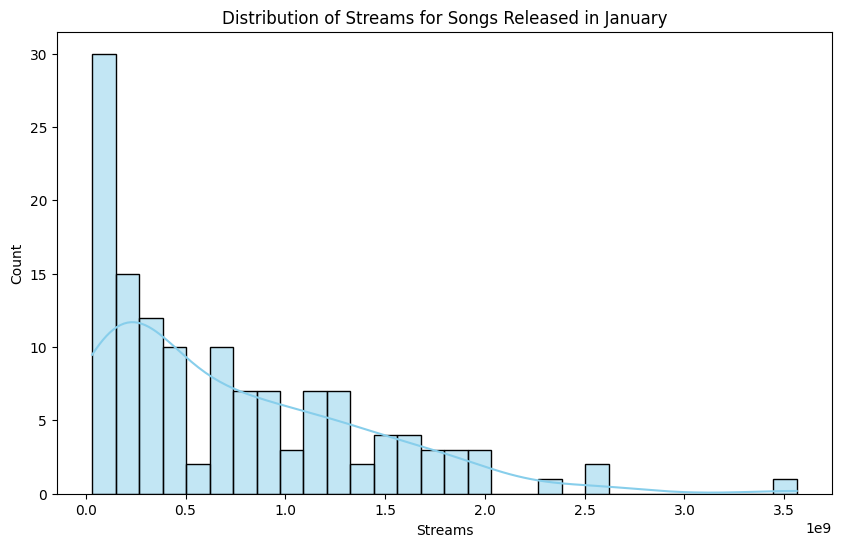

In [217]:
plt.figure(figsize=(10, 6))

sns.histplot(january_songs['streams'], bins=30, kde=True, color='skyblue')

plt.xlabel('Streams')
plt.title('Distribution of Streams for Songs Released in January')
plt.show()

In [218]:
january_songs = df[df['released_month'] == 1]

top_10_january_songs = january_songs.sort_values(by='streams', ascending=False).head(10)

top_10_january_songs[['track_name', 'artist(s)_name', 'streams', 'released_year']]

,track_name,artist(s)_name,streams,released_year
179,Shape of You,Ed Sheeran,3.562544e+09,2017
140,Believer,Imagine Dragons,2.594040e+09,2017
138,Perfect,Ed Sheeran,2.559529e+09,2017
685,Thinking Out Loud,Ed Sheeran,2.280566e+09,2014
157,Counting Stars,OneRepublic,2.011464e+09,2013
80,Riptide,Vance Joy,2.009095e+09,1975
720,Wake Me Up - Radio Edit,Avicii,1.970673e+09,2013
535,drivers license,Olivia Rodrigo,1.858144e+09,2021
173,Demons,Imagine Dragons,1.840365e+09,2012
296,Lose Yourself - Soundtrack Version,Eminem,1.829993e+09,2002


In [219]:
february_songs = df[df['released_month'] == 2]

top_10_february_songs = february_songs.sort_values(by='streams', ascending=False).head(10)

top_10_february_songs[['track_name', 'artist(s)_name', 'streams', 'released_year']]

,track_name,artist(s)_name,streams,released_year
724,Something Just Like This,"The Chainsmokers, Coldplay",2.204081e+09,2017
167,The Night We Met,Lord Huron,1.410089e+09,2015
114,Everybody Wants To Rule The World,Tears For Fears,1.205952e+09,1985
603,HEARTBREAK ANNIVERSARY,Giveon,9.516376e+08,2020
323,Dark Red,Steve Lacy,9.200457e+08,2017
696,La Santa,"Daddy Yankee, Bad Bunny",7.592088e+08,2020
648,MAMIII,"Karol G, Becky G",7.165915e+08,2022
371,After Hours,The Weeknd,6.980861e+08,2020
676,A Tu Merced,Bad Bunny,6.850718e+08,2020
34,TQG,"Karol G, Shakira",6.189904e+08,2023


There is a single outlier in January but overall there are larger number of streams.

Let's do the same for September.

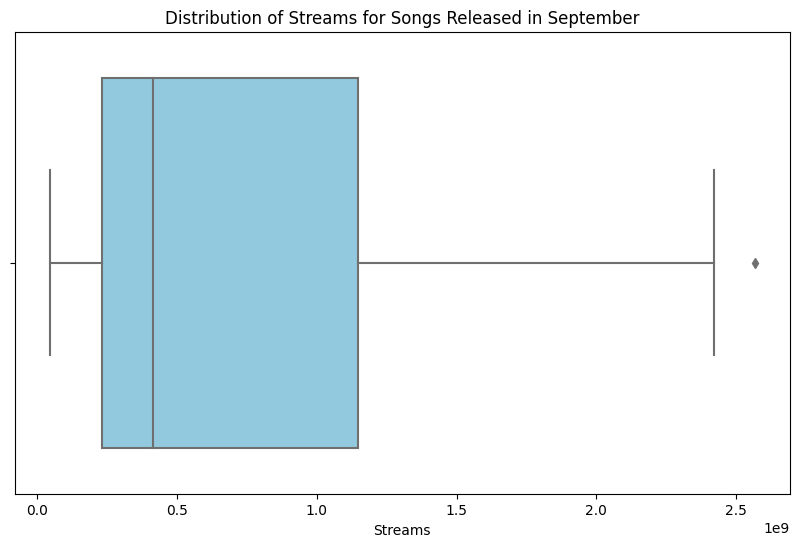

In [162]:
september_songs = df[df['released_month'] == 9]

plt.figure(figsize=(10, 6))

sns.boxplot(x=september_songs['streams'], color='skyblue')

plt.xlabel('Streams')
plt.title('Distribution of Streams for Songs Released in September')
plt.show()

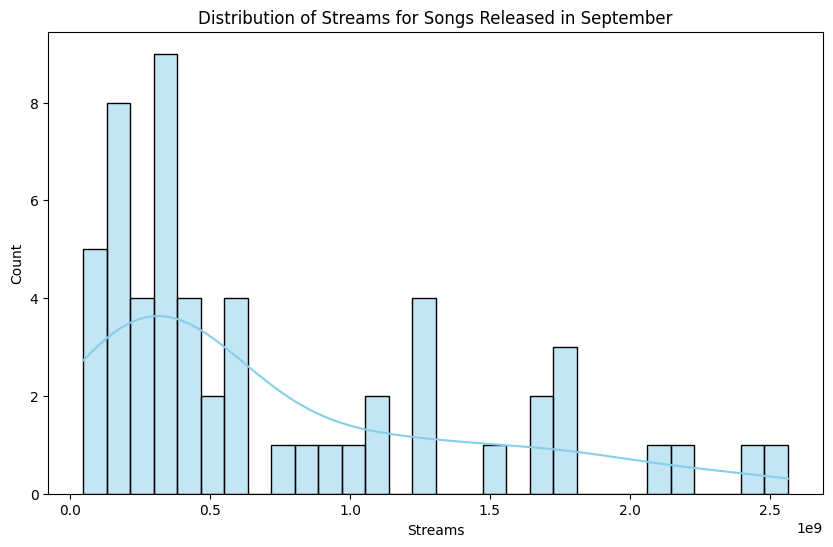

In [163]:
plt.figure(figsize=(10, 6))

sns.histplot(september_songs['streams'], bins=30, kde=True, color='skyblue')

plt.xlabel('Streams')
plt.title('Distribution of Streams for Songs Released in September')
plt.show()

In [164]:
september_songs = df[df['released_month'] == 9]

top_10_september_songs = september_songs.sort_values(by='streams', ascending=False).head(10)

top_10_september_songs[['track_name', 'artist(s)_name', 'streams', 'released_year']]

,track_name,artist(s)_name,streams,released_year
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09,2016
324,Say You Won't Let Go,James Arthur,2.420461e+09,2016
634,Shallow,"Lady Gaga, Bradley Cooper",2.159347e+09,2018
189,Take Me To Church,Hozier,2.135158e+09,2013
630,Mr. Brightside,The Killers,1.806618e+09,2003
641,Memories,Maroon 5,1.759568e+09,2019
519,MONTERO (Call Me By Your Name),Lil Nas X,1.735442e+09,2020
754,There's Nothing Holdin' Me Back,Shawn Mendes,1.714491e+09,2016
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,1.690193e+09,1991
429,Bad Habits,Ed Sheeran,1.555511e+09,2020


September doesn't have the same outliers that January does.

Let's repeat the one-way ANOVA test here.


$H_{0}$: There is no difference between the month that a song is released in and how many streams it gets.

$H_{a}$: There is a difference between the month that a song is released in and how many streams it gets.

In [165]:
month_songs = df['released_month'].value_counts()
month_songs

released_month
1     134
5     128
3      86
6      86
11     80
12     75
10     73
4      66
7      62
2      61
9      56
8      46
Name: count, dtype: int64

In [220]:
months_enough_data = month_songs[month_songs >= 5].index
filtered_df_months = df[df['released_month'].isin(months_enough_data)]

In [221]:
filtered_df_months['streams'].isna().sum()


1

In [222]:
filtered_df_months = filtered_df_months.dropna(subset=['streams'])

In [223]:
anova_groups_months = [filtered_df_months[filtered_df_months['released_month'] == month]['streams'] for month in months_enough_data]
anova_groups_months = [group for group in anova_groups_months if not group.empty]
if len(anova_groups_months) > 1:
    anova_result_months = stats.f_oneway(*anova_groups_months)
    print("ANOVA Result:\n", anova_result_months)
else:
    print("Not enough groups with data to perform ANOVA.")


ANOVA Result:
 F_onewayResult(statistic=4.795282070206738, pvalue=3.267617433013214e-07)


The p-value is much smaller than 0.05 allowing us to reject the null hypothesis. 

Although the F-Statistic is only moderate at only 4.795, in combination with the p-value, we're able to say that there's a statistically significant chance that there is a difference in number of streams depending on what month a song is released in.

Now let's take a closer look using box plots.

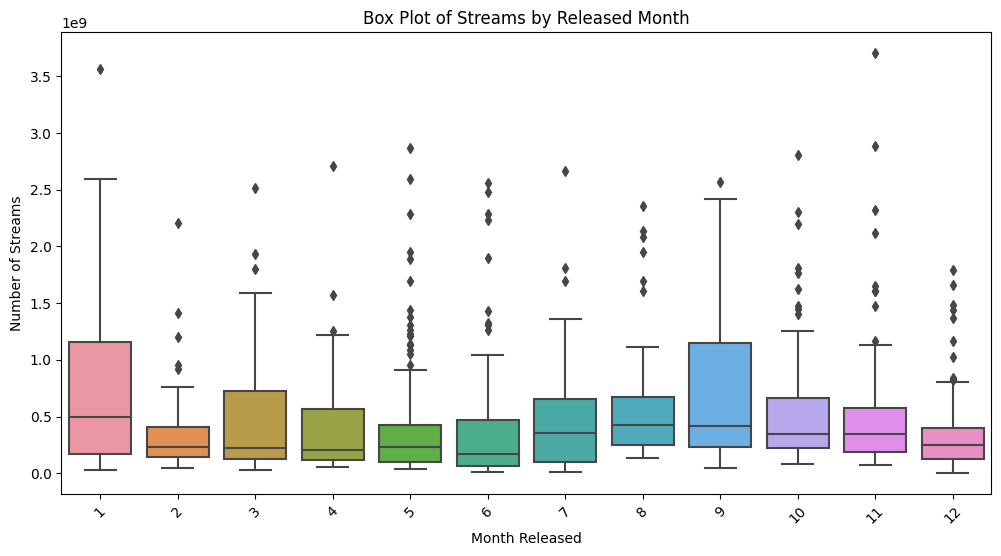

In [224]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='released_month', y='streams', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Streams by Released Month')
plt.xlabel('Month Released')
plt.ylabel('Number of Streams')
plt.show()

This shows that although the median number of streams for songs released in each month is the same (or very close), there is significant variance in the distribution of streams within each month. This variability can lead to differences in the means of the groups and is reflected in the statistically significant results of the ANOVA test, as indicated by the low p-value.

# Popularity of Songs Based on Characteristics and the Season they were Released in


First let's define the seasons.

In [171]:
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [172]:
df['season'] = df['released_month'].apply(season)

In [173]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_list,decade,season
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,80,89,83,31,0,8,4,"[Latto, Jung Kook]",2020,Summer
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,71,61,74,7,0,10,4,[Myke Towers],2020,Spring
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,51,32,53,17,0,31,6,[Olivia Rodrigo],2020,Summer
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,55,58,72,11,0,11,15,[Taylor Swift],2010,Summer
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,65,23,80,14,63,11,6,[Bad Bunny],2020,Spring


In [174]:
seasonal_characteristics = df.groupby('season')[['energy_%', 'danceability_%','valence_%', 'acousticness_%','instrumentalness_%','liveness_%','speechiness_%','streams']].mean()
seasonal_characteristics

,energy_%,danceability_%,valence_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams
season,,,,,,,,
Fall,62.191388,65.263158,46.239234,26.650718,2.019139,17.961722,10.205742,6.140543e+08
Spring,64.325000,67.960714,50.957143,28.260714,1.400000,18.396429,10.982143,4.318064e+08
Summer,65.809278,69.195876,51.247423,23.701031,2.742268,17.551546,9.706186,4.855516e+08
Winter,64.748148,65.662963,56.074074,28.537037,0.596296,18.692593,9.496296,5.428204e+08


In [175]:
columns = ['energy_%', 'danceability_%','valence_%', 'acousticness_%','instrumentalness_%','liveness_%','speechiness_%','streams']

seasonal_correlations = {}

for season in df['season'].unique():
    season_data = df[df['season'] == season][columns]  # Filter for the season
    correlations = season_data.corr()['streams'].drop('streams')  # Get correlations with 'streams'
    seasonal_correlations[season] = correlations.sort_values(key=abs, ascending=False)  # Sort by strength

for season, correlations in seasonal_correlations.items():
    print(f"\nCorrelations with 'streams' for {season} season:")
    print(correlations)


Correlations with 'streams' for Summer season:
danceability_%       -0.160434
acousticness_%        0.158149
energy_%             -0.139453
liveness_%           -0.094483
speechiness_%        -0.084424
instrumentalness_%   -0.084300
valence_%            -0.032729
Name: streams, dtype: float64

Correlations with 'streams' for Spring season:
speechiness_%        -0.149025
danceability_%       -0.118433
valence_%            -0.072101
acousticness_%       -0.062757
liveness_%            0.036747
energy_%              0.007694
instrumentalness_%    0.004875
Name: streams, dtype: float64

Correlations with 'streams' for Winter season:
acousticness_%       -0.140243
speechiness_%        -0.092198
liveness_%           -0.080109
valence_%            -0.048620
danceability_%        0.017719
instrumentalness_%    0.015992
energy_%              0.012488
Name: streams, dtype: float64

Correlations with 'streams' for Fall season:
danceability_%       -0.158620
speechiness_%        -0.103838
acousti

There seems to be no significant correlation between any of these characteristics and whether a song released in a specific season is more popular.

# Popularity of songs based on danceability

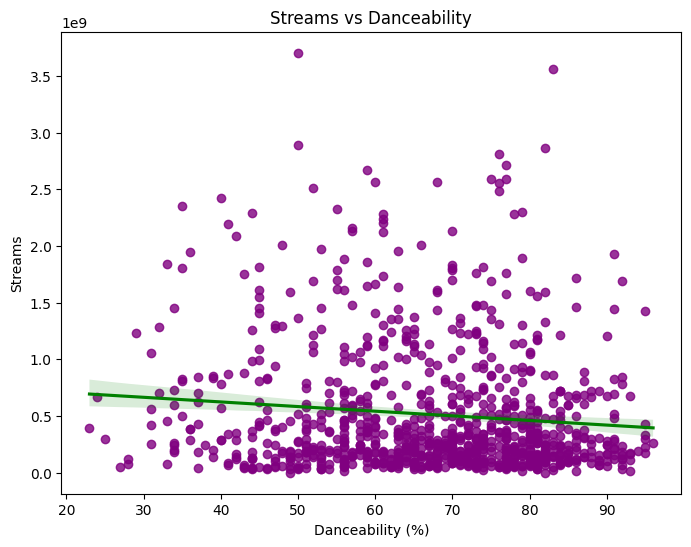

In [176]:
plt.figure(figsize=(8, 6))

sns.regplot(x=df['danceability_%'], y=df['streams'], scatter_kws={'color': 'purple'}, line_kws={'color': 'green'})

plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.title('Streams vs Danceability')
plt.show()

Although there was a low indication of correlation when observed above, this graph seems to show a slight change in popularity of songs as the danceability increases. Let's run a one-way ANOVA test to check this.

$H_{0}$: There is no difference between the danceability of a song and how many streams it gets.

$H_{a}$: There is a difference between the danceability of a song and how many streams it gets.

Let's define some bins.

In [177]:
bins = [0, 33, 66, 100]
labels = ['Low', 'Medium', 'High']
df['danceability_category'] = pd.cut(df['danceability_%'], bins=bins, labels=labels)

In [178]:
df_cleaned_dance = df.dropna(subset=['streams', 'danceability_%'])


In [179]:
anova_groups_dance = [df_cleaned_dance[df_cleaned_dance['danceability_category'] == category]['streams'] for category in labels]
anova_groups_dance = [group for group in anova_groups_dance if not group.empty]

if len(anova_groups_dance) > 1:
    anova_result_dance = stats.f_oneway(*anova_groups_dance)
    print("ANOVA Result:")
    print(anova_result_dance)
else:
    print("Not enough groups with data to perform ANOVA.")

ANOVA Result:
F_onewayResult(statistic=3.8959038713962464, pvalue=0.020650884395524878)


We can reject the null hypothesis due to the p-value being below 0.05. Let's visualize the different buckets we've created.

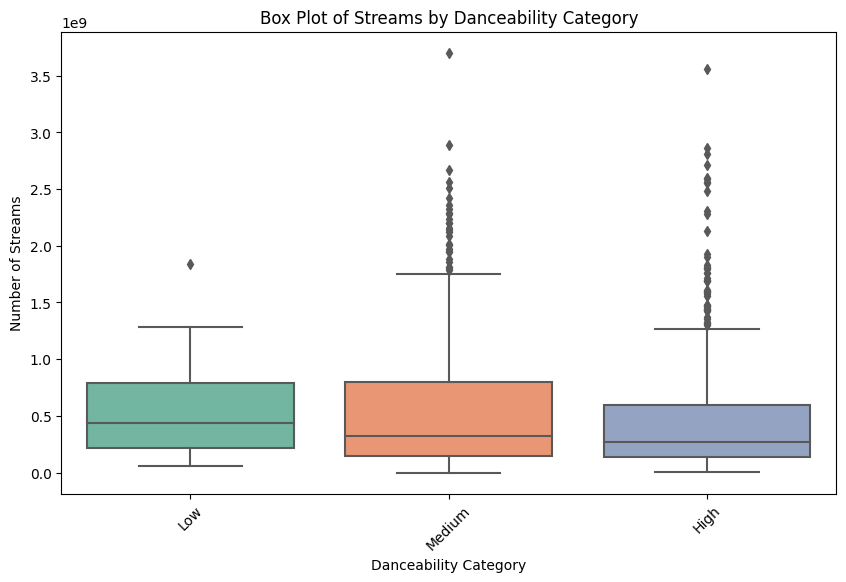

In [180]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='danceability_category', y='streams', data=df_cleaned_dance, palette='Set2')
plt.xlabel('Danceability Category')
plt.ylabel('Number of Streams')
plt.title('Box Plot of Streams by Danceability Category')
plt.xticks(rotation=45)
plt.show()

There seems to be a high variability in the number of streams medium and higher danceability songs have compared to low danceability songs which seem to more reliabily score higher on streams.

# Streams vs Energy Level of Song

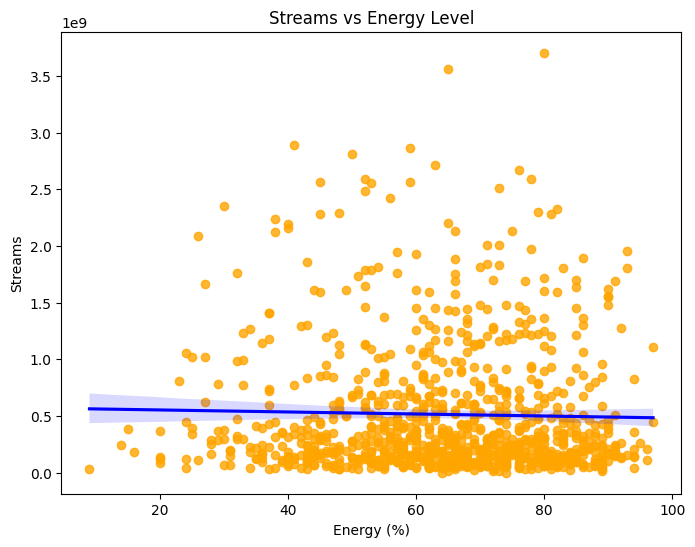

In [181]:
plt.figure(figsize=(8, 6))

sns.regplot(x=df['energy_%'], y=df['streams'], scatter_kws={'color': 'orange'}, line_kws={'color': 'blue'})

plt.xlabel('Energy (%)')
plt.ylabel('Streams')
plt.title('Streams vs Energy Level')
plt.show()

# Streams vs Acousticness

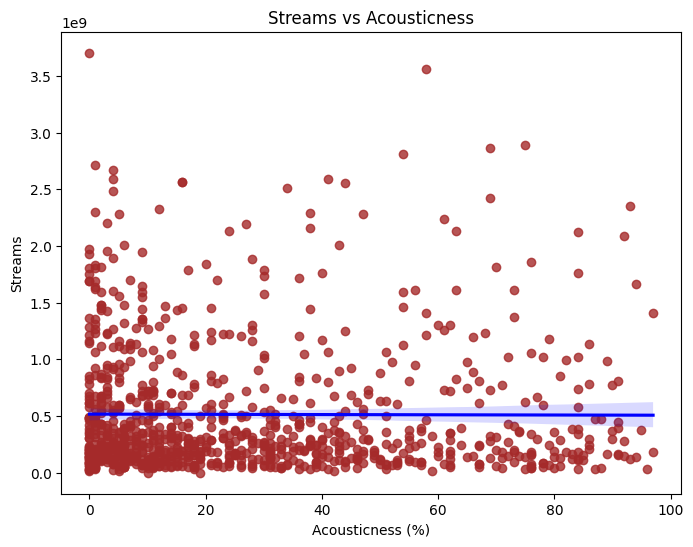

In [182]:
plt.figure(figsize=(8, 6))

sns.regplot(x=df['acousticness_%'], y=df['streams'], scatter_kws={'color': 'brown'}, line_kws={'color': 'blue'})

plt.xlabel('Acousticness (%)')
plt.ylabel('Streams')
plt.title('Streams vs Acousticness')
plt.show()

# Beats per Minute vs Streams

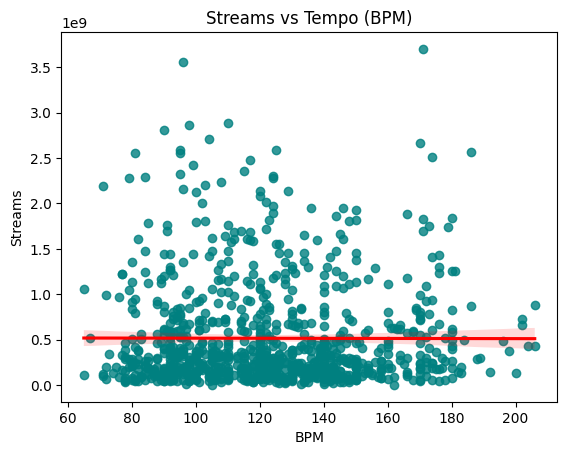

In [183]:
sns.regplot(x=df['bpm'], y=df['streams'], scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.title('Streams vs Tempo (BPM)')
plt.show()

# Streams vs Valence

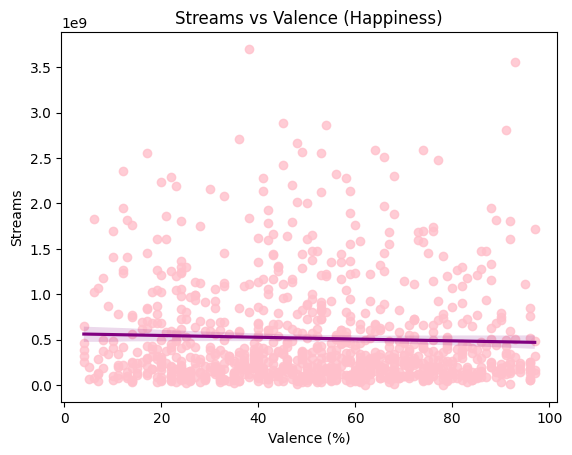

In [184]:
sns.regplot(x=df['valence_%'], y=df['streams'], scatter_kws={'color': 'pink'}, line_kws={'color': 'purple'})
plt.xlabel('Valence (%)')
plt.ylabel('Streams')
plt.title('Streams vs Valence (Happiness)')
plt.show()

# Number of Songs per Artist vs Streams

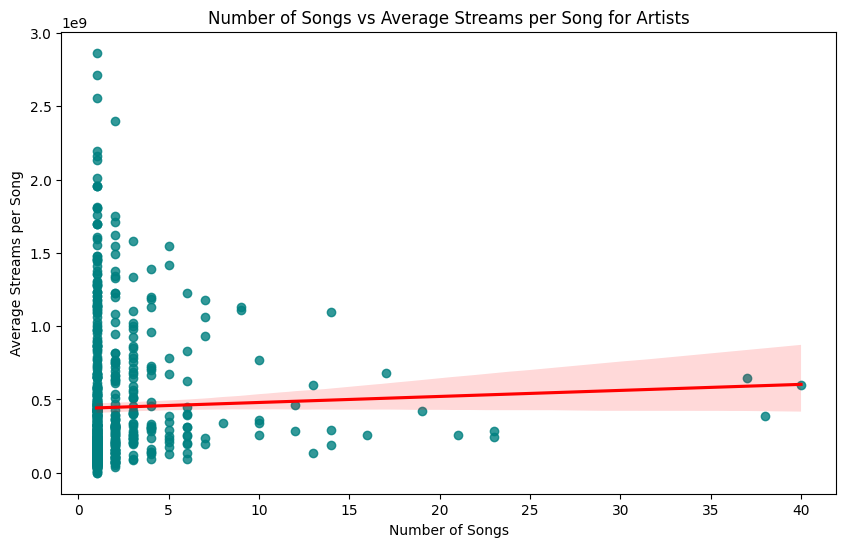

In [185]:
df['artist_list'] = df['artist(s)_name'].str.split(', ')
df_exploded = df.explode('artist_list')

artist_stats = df_exploded.groupby('artist_list').agg(
    total_streams=('streams', 'sum'),
    total_songs=('track_name', 'count')
).reset_index()

artist_stats['average_streams_per_song'] = artist_stats['total_streams'] / artist_stats['total_songs']

plt.figure(figsize=(10, 6))

sns.regplot(x=artist_stats['total_songs'], y=artist_stats['average_streams_per_song'], 
            scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})

plt.xlabel('Number of Songs')
plt.ylabel('Average Streams per Song')
plt.title('Number of Songs vs Average Streams per Song for Artists')
plt.show()

It looks like an artist having a lot of songs doesn't increase their likelihood of having high average streaming levels per song. This might also be due to an artist with many songs having both very popular and very unpopular songs which would bring down their average. It may be best to look at their most popular song instead.

# Number of Songs of an Artist vs Their Highest Streamed Songs

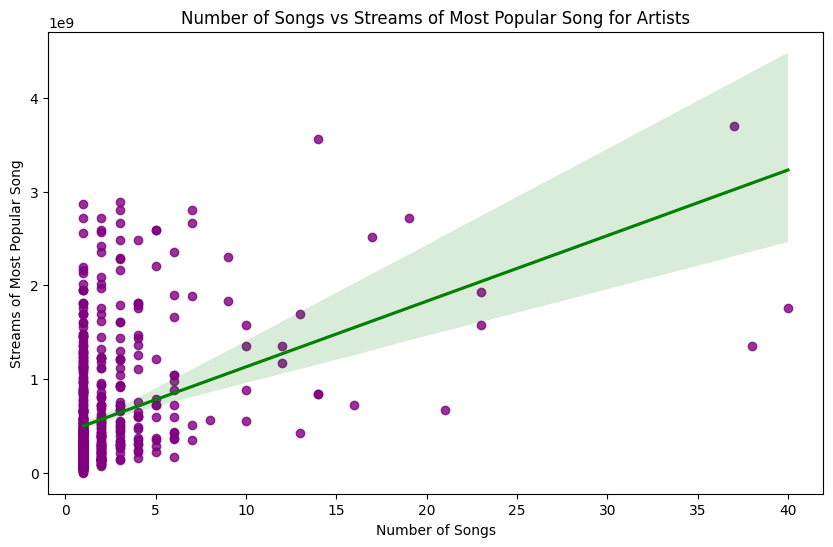

In [186]:
df['artist_list'] = df['artist(s)_name'].str.split(', ')
df_exploded = df.explode('artist_list')

artist_stats = df_exploded.groupby('artist_list').agg(
    total_songs=('track_name', 'count'),
    most_popular_streams=('streams', 'max')  
).reset_index()

plt.figure(figsize=(10, 6))

sns.regplot(x=artist_stats['total_songs'], y=artist_stats['most_popular_streams'], 
            scatter_kws={'color': 'purple'}, line_kws={'color': 'green'})

plt.xlabel('Number of Songs')
plt.ylabel('Streams of Most Popular Song')
plt.title('Number of Songs vs Streams of Most Popular Song for Artists')
plt.show()

There seems to be a trend that shows the more songs an artist has the more likely they are to have a very popular song but there isn't enough data to confirm this confidentally. 

# Conclusions
The most prominent trend discovered was that songs in more recent decades had more streams on average with the exception of the 2020s which were subject to changes in pop culture including the rise of microtrends. 

As well, it discovered was that songs released in January and September are the most streamed followed by August, October and November. 

There also seems to be a trend where the most songs an artist has the more likely they are the have a highly streamed song.

Finally, a song's danceability may determine how reliabily it will be high streaming. While low danceability songs seem to more reliabily perform better, medium and high dancebility songs have higher variance and may have a higher chance of being exceedingly popular.